# Development of AI model for in vitro dissolution profile prediction (an example in R)

## 1. Introduction

Required packages:  
`groupdata2`  
`dplyr`  
`neuralnet`  
`randomForest`  
`scales`  
`ggplot2`  
`gridExtra`  
`grid`  
`MLmetrics`  

This is an R Markdown Notebook. If you wish to run or edit the notebook, please use RStudio to open the .Rmd file. You can also run the example in the R console.

### Installation of R (and Rstudio)
The R environment and Rstudio is available for the Windows, OS X (Mac) and Linux. In order to install R please visit the link https://cran.r-project.org/ then chose on of the following options:

### Linux
R is available through most Linux package managers. You can download the binary files for your distribution from CRAN. Or you can use your package manager (e.g. for Debian/Ubuntu run sudo apt-get install r-base and for Fedora run sudo yum install R). If your package manager doesn’t contain R-base of r-base pacakge, please chose your distribution and follow the instructions at CRAN webpage.
### OS X (Mac)
Go to CRAN and click on Download R for (Mac) OS X https://cran.r-project.org/bin/macosx/
Select the .pkg file for the version of OS X that you have and the file will download.
Double click on the file that was downloaded and R will install.
### Windows
Download R for Windows https://cran.r-project.org/bin/windows/base/
Run the .exe file that was downloaded in the step above.
In order to install Rstudio please go to the https://rstudio.com/products/rstudio/download/#download find your operating system and download appriopriate installer (exe, dmg, deb or rpm). Once it’s downloaded, double click the file to install it.

### Installing additonal packages:  

`install.packages("packageName",
                 repos = "https://cloud.r-project.org/", lib='~/R')`

In order to use the pacakge after installation, it has to be loaded:

`library(packageName)`

### Getting help:  
 * [https://rseek.org/](https://rseek.org/)  

### Jupyter notebook  
We will be using the Jupyter notebook for our classes. Every notebook has an associated language called the "kernel". We will be using the Python 3  or R kernel (please see upper right corner) from the IPython project.
Here we present ipynb for R. In case when it will be impossible to run R in notebook, you will be noticed.
For more information on how to use the jupyter notebook, please refer to following webpages:  

* https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/
* https://www.codecademy.com/articles/how-to-use-jupyter-notebooks
* https://realpython.com/jupyter-notebook-introduction/
* https://docs.anaconda.com/anaconda/navigator/tutorials/r-lang/

## 2. The data set  
In the case we will be trying to develop a model for prediction of API dissolution from PLGA particles. The drug release from the PLGA matrix is mainly governed by two mechanisms: diffusion and degradation/erosion. Altough, those mechanisms are affected by many factors. For example, pore diameters, matrix–API interactions, API–API interactions, and formulation composition. Results reported in the literature indicate the high level of complexity of drug release from PLGA-based formulations. Therefore, it seems reasonable to use machine learning algorithms to search for optimal model.  

The data sets were collected from the literature. Release rates of 68 PLGA formulations from 18 publications were extracted from the publications and maunally digitized. The description of each point was completed by the (1) formulation characteristics (PLGA inherent viscosity, PLGA molecular weight, lactide-to-glycolide ratio, inner and outer phase Polyvinyl alcohol (PVA) concentration, PVA molecular weight, inner phase volume, encapsulation rate, mean particle size, and PLGA concentration); (2) the experimental conditions (dissolution pH, number of dissolution additives, dissolution additive concentration and production method, and dissolution time); and (3 & 4) the molecular descriptors of the macromolecules and excipients. Overall there were 745 data rows with 300 variables. The molecular descriptors were computed using Marvin cxcalc plugin, UK (https://chemaxon.com/products/calculators-and-predictors). The amount of the drug substance released (Q) was the only dependent variable.  

The data set is available at:  
[Szlęk J, Pacławski A, Lau R, Jachowicz R, Mendyk A. Heuristic modeling of macromolecule release from PLGA microspheres. Int J Nanomedicine. 2013;8(1):4601-4611, https://doi.org/10.2147/IJN.S53364](https://www.dovepress.com/heuristic-modeling-of-macromolecule-release-from-plga-microspheres-peer-reviewed-article-IJN)

![Data_set](img/PLGA_dataset_overview.png)

## 3. The workflow
The general scheme of the proposed workflow is presented below.

![workflow](img/workflow_PLGA.png)

## 4. PLGA example

Loading required packages (or installing them):

In [1]:
library(groupdata2)
library(dplyr)
library(neuralnet)
library(randomForest)
library(scales)
library(ggplot2)
library(gridExtra)
library(grid)
library(MLmetrics)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin



Attaching package: ‘gridExtra’


The following object is masked from ‘package:randomForest’:

    combine


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘MLmetrics’


The following object is masked from ‘package:base’:

    Re

Loading data

In [2]:
my_data <- read.csv('dataset/PLGA_300in_SR_BAZA.csv', sep = '\t')

Making sure that the column 'Formulation_no' is a factor.

In [3]:
my_data$Formulation_no <- as.factor(my_data$Formulation_no)

Let's look at the data

In [4]:
head(my_data, 15)

,Formulation_no,C_no,H_no,N_no,O_no,S_no,Aliphatic_atom_count,Aliphatic_bond_count,Aliphatic_ring_count,Aromatic_atom_count,⋯,pH_7_msdon.1,pH_8_msdon.1,pH_9_msdon.1,pH_10_msdon.1,pH_11_msdon.1,pH_12_msdon.1,pH_13_msdon.1,pH_14_msdon.1,Time_Days,Q_perc
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2935,4617,781,897,39,4267,4360,28,385,⋯,0,0,0,0,0,0,0,0,0.000,0.000
2,1,2935,4617,781,897,39,4267,4360,28,385,⋯,0,0,0,0,0,0,0,0,1.129,4.755
3,1,2935,4617,781,897,39,4267,4360,28,385,⋯,0,0,0,0,0,0,0,0,2.097,6.152
4,1,2935,4617,781,897,39,4267,4360,28,385,⋯,0,0,0,0,0,0,0,0,8.226,7.247
5,1,2935,4617,781,897,39,4267,4360,28,385,⋯,0,0,0,0,0,0,0,0,14.839,8.621
6,1,2935,4617,781,897,39,4267,4360,28,385,⋯,0,0,0,0,0,0,0,0,22.903,11.388
7,1,2935,4617,781,897,39,4267,4360,28,385,⋯,0,0,0,0,0,0,0,0,30.000,14.160
8,1,2935,4617,781,897,39,4267,4360,28,385,⋯,0,0,0,0,0,0,0,0,36.935,16.652
9,1,2935,4617,781,897,39,4267,4360,28,385,⋯,0,0,0,0,0,0,0,0,45.806,23.897


First step of our workflow will be feature selection. We can apply here a RanodmForest model.  
How does Random Forest work as feature selector? Random Forests consist of few hundred decision trees. Each tree is built over a randomly selected observations and  features. At each node, the three divides the dataset into 2 "buckets", each of them hosting observations that are more similar among themselves and different from the ones in the other "bucket". Therefore, the importance of each feature is derived from how “pure” each of the "bucket's" is.  
When training a tree, it is possible to compute how much each feature decreases the impurity. The more a feature decreases the impurity, the more important the feature is. In random forests, the impurity decrease from each feature can be averaged across trees to determine the final importance of the variable.  
Features that are selected at the top of the trees (the root of the tree) are in general more important than features that are selected at the end nodes of the trees, as generally the top splits lead to bigger information gains.  

In [5]:
# 1) Feature selection

my_data_num <- my_data[,-1] # get data without "Formulation_no" column
fit_rf = randomForest(Q_perc~., data=my_data_num, ntree = 500) # develop RF model
importance(fit_rf) # create an importance based on mean decreasing gini

,IncNodePurity
C_no,396.937041
H_no,266.945160
N_no,241.208234
O_no,177.861582
S_no,1490.044125
Aliphatic_atom_count,202.997759
Aliphatic_bond_count,339.907443
Aliphatic_ring_count,395.485444
Aromatic_atom_count,916.643150
Aromatic_bond_count,885.867385


In [6]:
scaled_imp <- scales::rescale(importance(fit_rf), to = c(1,100)) # scale from 0 to 100
scaled_imp <- scaled_imp[order(scaled_imp, decreasing =TRUE),] # reorder scaled data frame

In [7]:
# plot the variable importance
pdf(file=paste("res_feature_selection",".pdf", sep=""), height = 8, width = 12)
op <- par(mar = c(10,4,4,2) + 0.1)
barplot(scaled_imp[1:25], main="Var imp",
        names.arg=names(scaled_imp[1:25]), cex.names=0.8, las=2)
par(op)
dev.off()

png 
  2

In [8]:
# select only 20 first features + "Formulation_no" + "Q_perc"
selected_features <- c("Formulation_no", names(scaled_imp[1:20]),"Q_perc") # create names vector
my_data <- my_data[,(c(selected_features))] # chose columns from vector names

In [9]:
# 2) Quick data visualisation
# Plot formulation dissolution profiles
pdf(file=paste("obs_cum",".pdf", sep=""), height = 12, width = 18)

plots_obs <- list()

  plots_obs <- ggplot(my_data, aes(Time_Days, Q_perc, color="blue")) +
    geom_line(aes(group = Formulation_no)) +
    scale_color_manual(labels = c("obs"), values = c("blue")) +
    facet_wrap(~Formulation_no)

print(plots_obs)  

dev.off()

png 
  2

In [10]:
# 3) Data splitting
set.seed(1234) # set.seed for splitting data
# create column with data partition
df_folded <- fold(my_data, 10,
                  id_col = "Formulation_no",
                  method = "n_dist")

# create empty lists to store training, testing and result
test <- list()
train <- list()
results <- list()


for(i in 1:10){
  test[[i]] = df_folded %>% filter(.folds==i)
  train[[i]] = df_folded %>% filter(.folds!=i)
}

In [11]:
drops <- c("Formulation_no", ".folds")

for(i in 1:10){
  tmp_test = as.data.frame(test[[i]])
  tmp_train = as.data.frame(train[[i]])
  
  tmp_test = tmp_test[, !(names(tmp_test) %in% drops)]
  tmp_train = tmp_train[, !(names(tmp_train) %in% drops)]
  
  tmp_test = tmp_test[,c(2:20,1,21)]
  tmp_train = tmp_train[,c(2:20,1,21)]
  
  write.table(tmp_test, file=paste("FS_data/t-PLGA_",(ncol(tmp_train)-1),"in_no_",i,".txt",sep=""), quote = FALSE, row.names = FALSE)
  write.table(tmp_train, file=paste("FS_data/PLGA_",(ncol(tmp_test)-1),"in_no_",i,".txt",sep=""), quote = FALSE, row.names = FALSE)
}

In [12]:
# 4) Modeling - Random Forest
# here we apply 10-fold cv scheme
for(i in 1:length(test)){
  
  tmp_test = as.data.frame(test[[i]])
  tmp_train = as.data.frame(train[[i]])
  
  tmp_test = tmp_test[, !(names(tmp_test) %in% drops)]
  tmp_train = tmp_train[, !(names(tmp_train) %in% drops)]
  
  tmp_rf = randomForest(Q_perc~., data=tmp_train, ntree=100, mtry=6) # training of RF models 
  tmp_pred <- predict(tmp_rf, tmp_test) # testing RF model
  
  results[[i]] <- tmp_pred # saving in results
  
}

In [13]:
# 5) Modeling - Random Forest - Results

rf_r2 <- list()
rf_rmse <- list()

for(i in 1:10){
  test[[i]] <- cbind(test[[i]],pred=results[[i]])
  rf_r2[[i]] <- MLmetrics::R2_Score(as.matrix(test[[i]]['pred']),as.matrix(test[[i]]['Q_perc']))
  rf_rmse[[i]] <- MLmetrics::RMSE(as.matrix(test[[i]]['pred']), as.matrix(test[[i]]['Q_perc']))
}

mean_rf_r2 <- mean(unlist(rf_r2))
mean_rf_rmse <- mean(unlist(rf_rmse))

cat("Mean 10-fold cv RMSE: ", mean_rf_rmse, "\n", sep="")
cat("Mean 10-fold cv R2: ", mean_rf_r2, "\n", sep="")

Mean 10-fold cv RMSE: 17.40415Mean 10-fold cv R2: 0.6278334

In [14]:
# 6
#  a) Modeling - Random Forest - Plots - to pdf
pdf(file=paste("res_cum_rf",".pdf", sep=""), height = 27, width = 27)

plots_res <- list()

for(i in 1:length(test)){
  
  plots_res[[i]] <- ggplot(test[[i]], aes(Time_Days, Q_perc, color="blue")) +
    geom_line(aes(group = Formulation_no)) +
    geom_line(aes(Time_Days, pred, color="red")) +
    geom_line(aes(group = Formulation_no)) + 
    scale_color_manual(labels = c("obs", "pred"), values = c("blue", "red")) +
    facet_wrap(~Formulation_no)
  
}

do.call('grid.arrange',c(plots_res, ncol = 2))

dev.off()

png 
  2

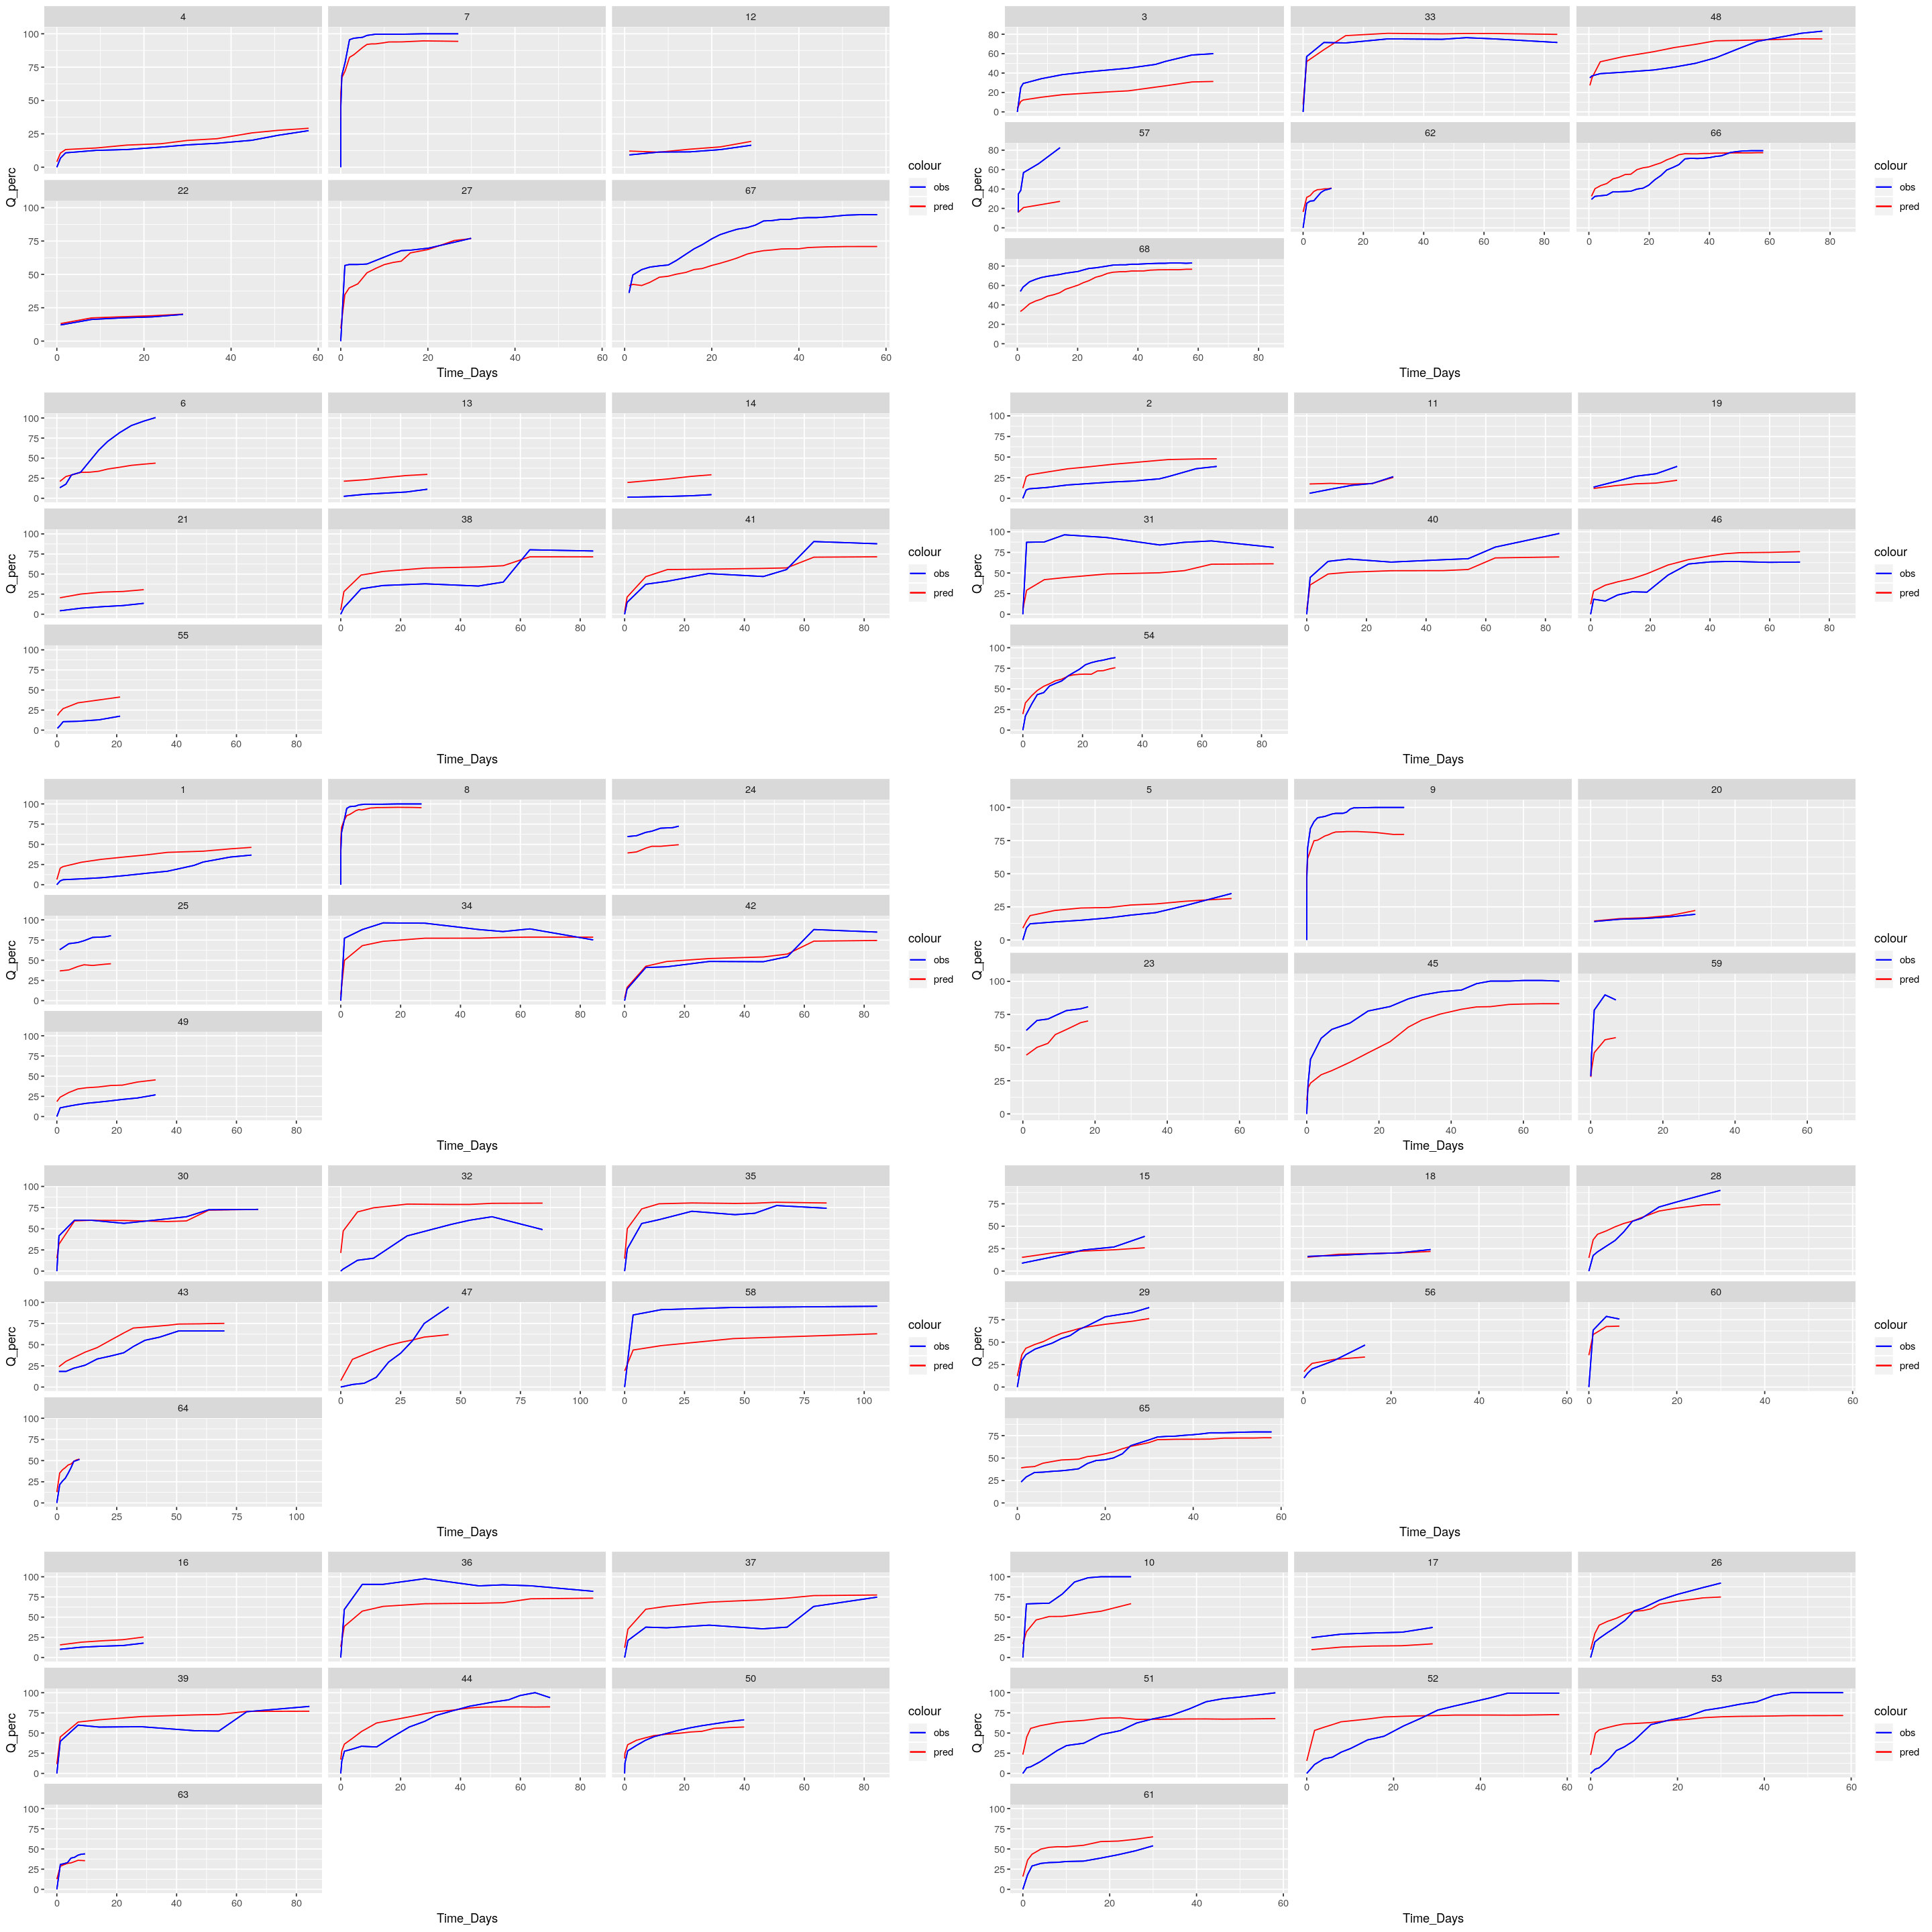

In [21]:
# 6
#  b) Modeling - Random Forest - Plots - to notebook
options(repr.plot.width=24, repr.plot.height=24)

plots_res <- list()

for(i in 1:length(test)){
  
  plots_res[[i]] <- ggplot(test[[i]], aes(Time_Days, Q_perc, color="blue")) +
    geom_line(aes(group = Formulation_no)) +
    geom_line(aes(Time_Days, pred, color="red")) +
    geom_line(aes(group = Formulation_no)) + 
    scale_color_manual(labels = c("obs", "pred"), values = c("blue", "red")) +
    facet_wrap(~Formulation_no)
  
}

do.call('grid.arrange',c(plots_res, ncol = 2))


In [15]:
# 7) Neural networks with neuralnet package 

# Scaling
maxs <- apply(my_data[2:ncol(my_data)], 2, max) 
mins <- apply(my_data[2:ncol(my_data)], 2, min)

scaled <- as.data.frame(
                        cbind(
                              Formulation_no=my_data$Formulation_no,
                              scale(my_data[2:ncol(my_data)], center = mins, scale = maxs - mins)
                              )
                        )

scaled$Formulation_no <- as.factor(scaled$Formulation_no)

# Data splitting
set.seed(1234)
# create column with data partition
df_folded_nn <- fold(scaled, 10,
                  id_col = "Formulation_no",
                  method = "n_dist")

# create empty lists to store training, testing and result
test_nn <- list()
train_nn <- list()
results_nn <- list()


for(i in 1:10){
  test_nn[[i]] = df_folded_nn %>% filter(.folds==i)
  train_nn[[i]] = df_folded_nn %>% filter(.folds!=i)
}

drops <- c("Formulation_no", ".folds")

In [16]:
# 8) Modeling - neural networks
# here we apply 10-fold cv scheme
for(i in 1:length(test_nn)){
  
  tmp_test_nn = as.data.frame(test_nn[[i]])
  tmp_train_nn = as.data.frame(train_nn[[i]])
  
  tmp_test_nn = tmp_test_nn[, !(names(tmp_test_nn) %in% drops)]
  tmp_train_nn = tmp_train_nn[, !(names(tmp_train_nn) %in% drops)]
  
  
  tmp_nn <- neuralnet(Q_perc ~ . , data=tmp_train_nn,
                      hidden=c(15,5,3,2),
                      linear.output=TRUE,
                      stepmax = 1000000,
                      threshold=0.05)
  
  tmp_nn$result.matrix
  
  # plot(tmp_nn)
  
  tmp_nn$weights
  
  tmp_pred_nn <- predict(tmp_nn, tmp_test_nn) # testing RF model
  
  results_nn[[i]] <- tmp_pred_nn # saving in results
  
}

# plotting structure of ANN
pdf(file=paste("nn_structure",".pdf", sep=""), height = 9, width = 15)
print(plot(tmp_nn, rep="best", radius = 0.1, arrow.length = 0.1, intercept = TRUE,
           intercept.factor = 0.2, information = TRUE, information.pos = 0.05))
dev.off()

NULL


png 
  2

In [17]:
# 9) Neural networks - results
nn_r2 <- list()
nn_rmse <- list()

for(i in 1:10){
  
  results_nn[[i]] <- results_nn[[i]]*(max(my_data$Q_perc)-min(my_data$Q_perc))+min(my_data$Q_perc)
  test_nn[[i]]['Time_Days'] <- test_nn[[i]]['Time_Days']*(max(my_data$Time_Days)-min(my_data$Time_Days))+min(my_data$Time_Days)
  test_nn[[i]]['Q_perc'] <- test_nn[[i]]['Q_perc']*(max(my_data$Q_perc)-min(my_data$Q_perc))+min(my_data$Q_perc)
  test_nn[[i]] <- cbind(test_nn[[i]],pred=results_nn[[i]])
  nn_r2[[i]] <- MLmetrics::R2_Score(as.matrix(test_nn[[i]]['pred']),as.matrix(test_nn[[i]]['Q_perc']))
  nn_rmse[[i]] <- MLmetrics::RMSE(as.matrix(test_nn[[i]]['pred']), as.matrix(test_nn[[i]]['Q_perc']))
  
}

mean_nn_r2 <- mean(unlist(nn_r2))
mean_nn_rmse <- mean(unlist(nn_rmse))

cat("Mean 10-fold cv RMSE: ", mean_nn_rmse, "\n", sep="")
cat("Mean 10-fold cv R2: ", mean_nn_r2, "\n", sep="")

Mean 10-fold cv RMSE: 21.53614Mean 10-fold cv R2: 0.3928243

In [ ]:
# 10
#   a) Neural networks - visualisation - to pdf

pdf(file=paste("res_cum_nn",".pdf", sep=""), height = 27, width = 27)

plots_res_nn <- list()

for(i in 1:length(test_nn)){
  
  plots_res_nn[[i]] <- ggplot(test_nn[[i]], aes(Time_Days, Q_perc, color="blue")) +
    geom_line(aes(group = Formulation_no)) +
    geom_line(aes(Time_Days, pred, color="red")) +
    geom_line(aes(group = Formulation_no)) + 
    scale_color_manual(labels = c("obs", "pred"), values = c("blue", "red")) +
    facet_wrap(~Formulation_no)
  
}

do.call('grid.arrange',c(plots_res_nn, ncol = 2))

dev.off()

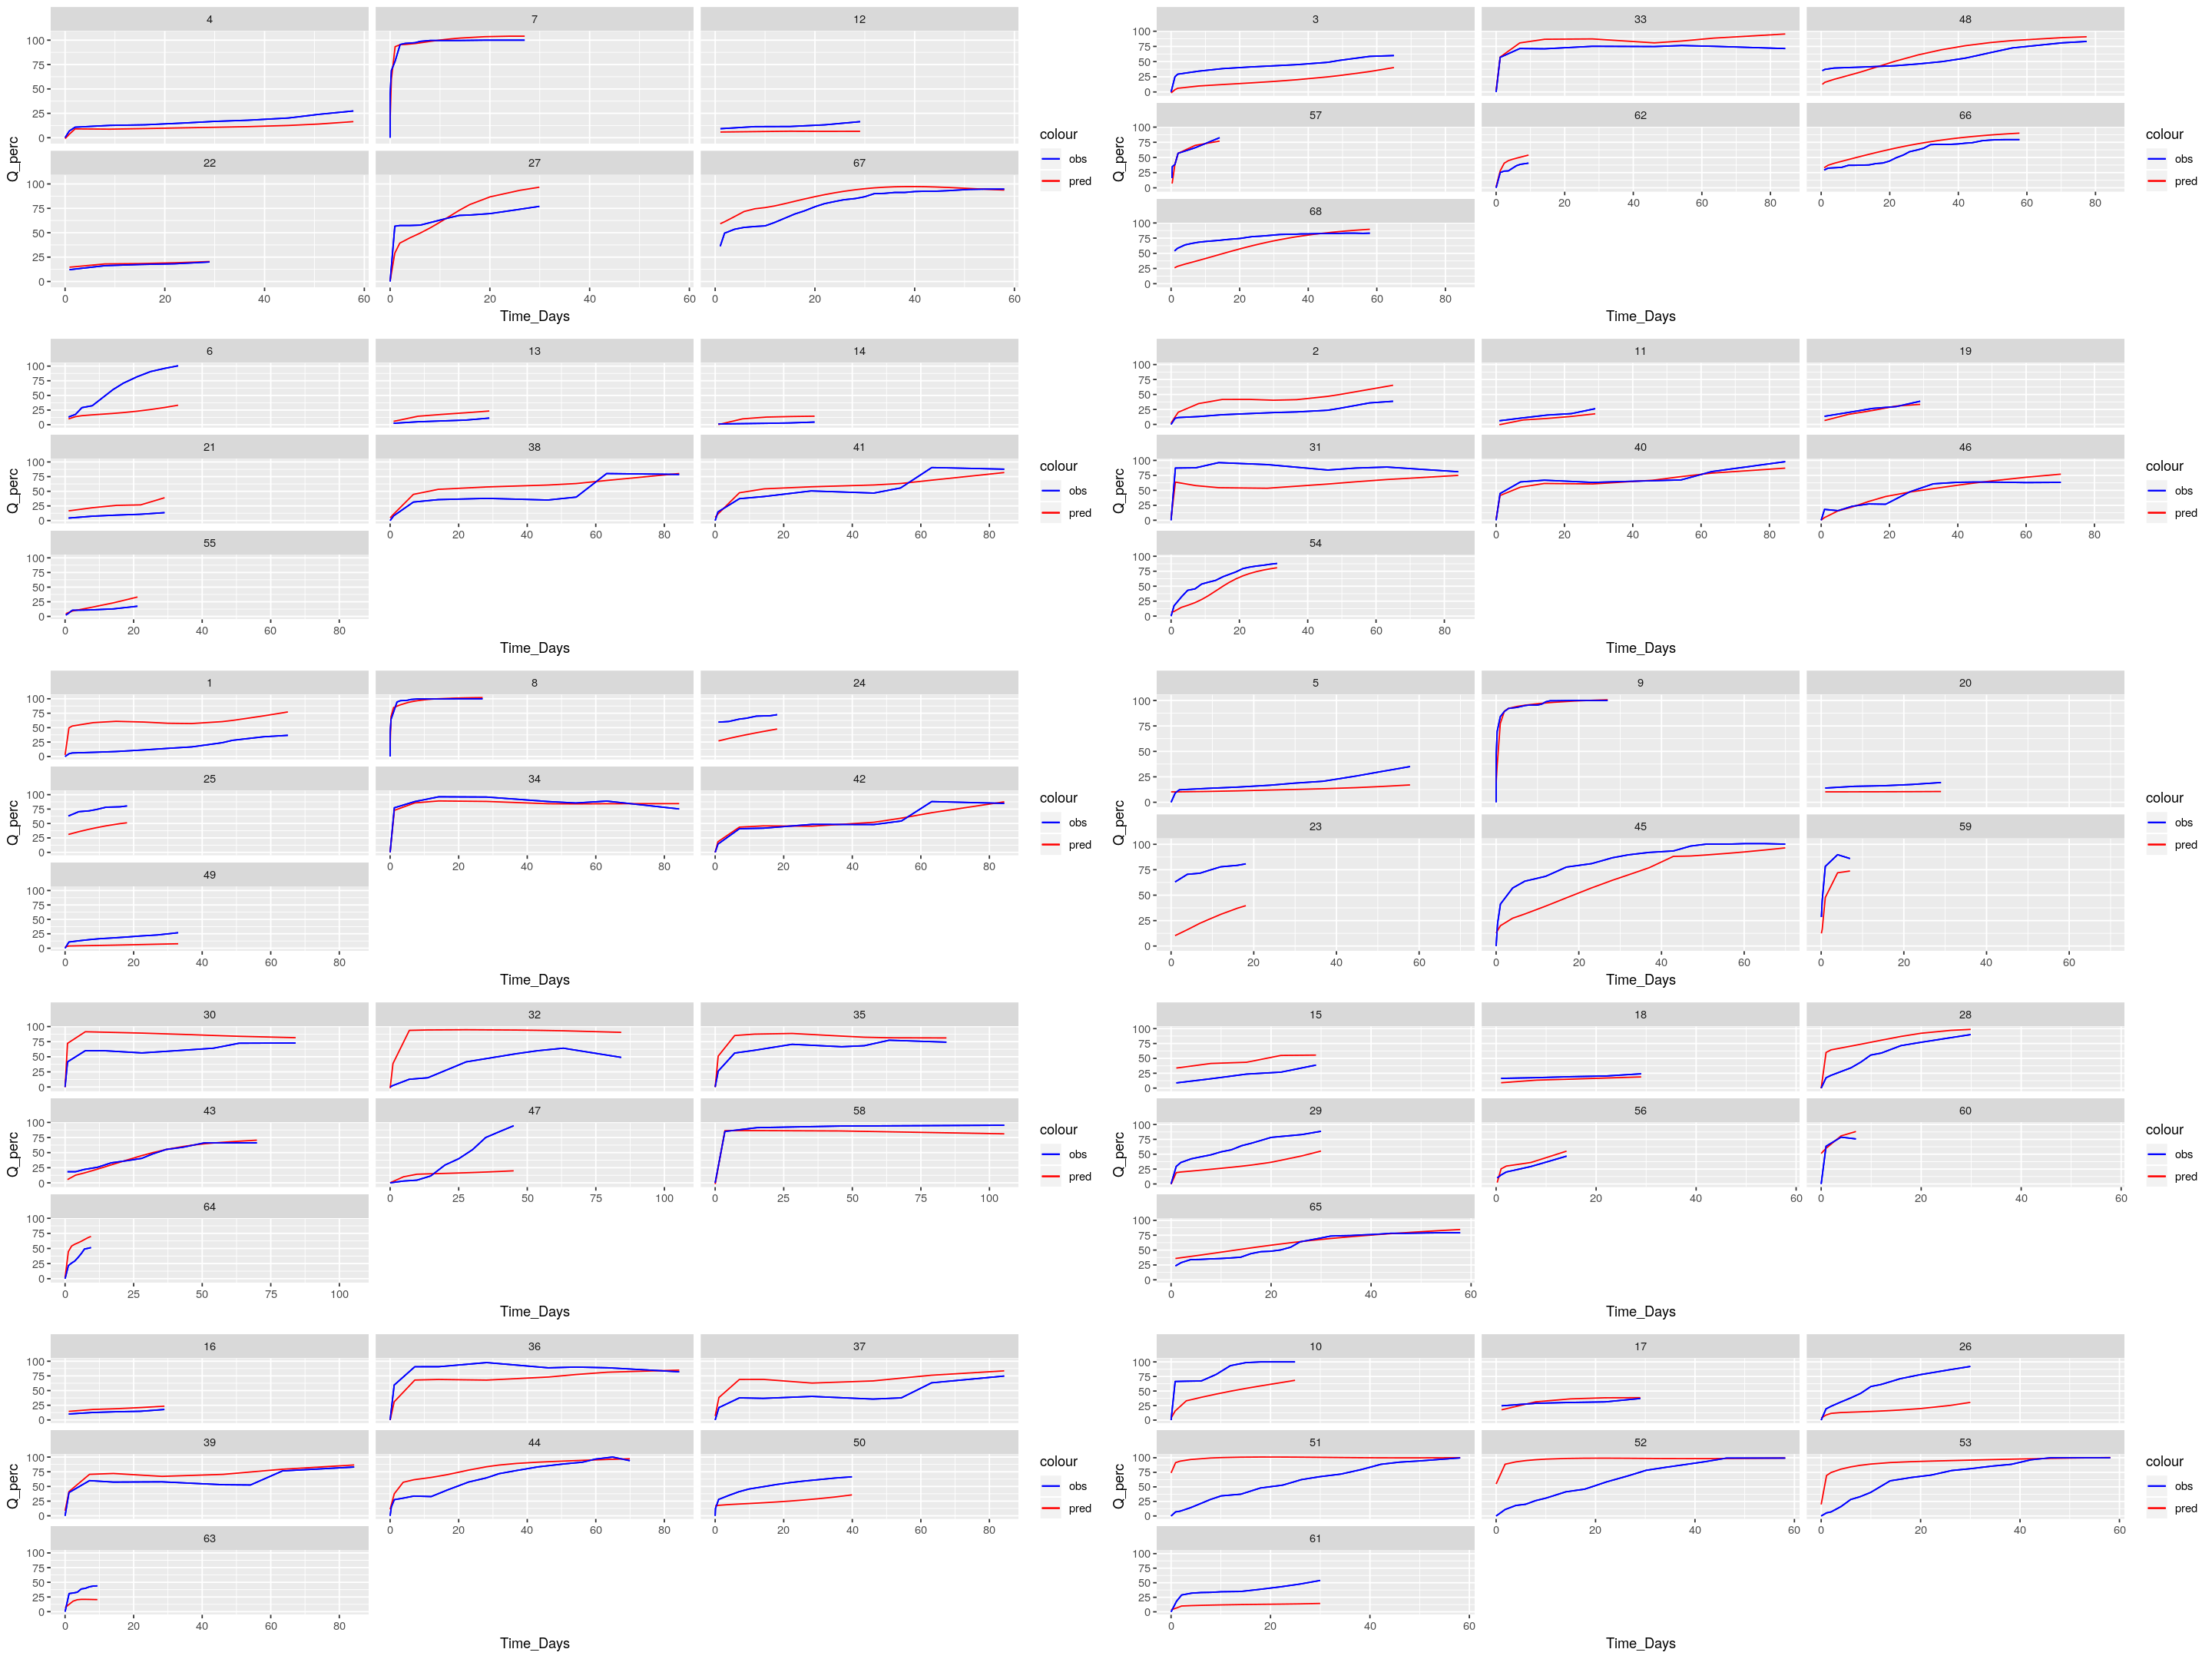

In [20]:
# 10 
#   b) Neural networks - visualisation - to notebook

options(repr.plot.width=24, repr.plot.height=24)

plots_res_nn <- list()

for(i in 1:length(test_nn)){
  
  plots_res_nn[[i]] <- ggplot(test_nn[[i]], aes(Time_Days, Q_perc, color="blue")) +
    geom_line(aes(group = Formulation_no)) +
    geom_line(aes(Time_Days, pred, color="red")) +
    geom_line(aes(group = Formulation_no)) + 
    scale_color_manual(labels = c("obs", "pred"), values = c("blue", "red")) +
    facet_wrap(~Formulation_no)
  
}

do.call('grid.arrange',c(plots_res_nn, ncol = 2))


__Questions?__

Jakub Szlęk, PhD – j.szlek@uj.edu.pl